In [1]:
import IPython as ipy
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.utils
import torch.optim as optim
import torch.utils.data as data
from tqdm.auto import tqdm

import itertools as it
import time

from ner import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device:', device)

device: cuda


In [2]:
#tok_to_id, glv_emb = load_emb('data/glove/glove.6B.100d.txt', int(4e5))
#torch.save((tok_to_id, glv_emb), 'data/pt-cache/tok_to_id__glv_emb.pt')
tok_to_id, glv_emb = torch.load('data/pt-cache/tok_to_id__glv_emb.pt')

In [3]:
#chr_to_id = load_chrs('data/ner-gmb/train.txt')
#torch.save(chr_to_id, 'data/pt-cache/chr_to_id.pt')
chr_to_id = torch.load('data/pt-cache/chr_to_id.pt')

In [5]:
#lbl_to_id, id_to_lbl = load_classes('data/ner-gmb/train.txt')
#torch.save((lbl_to_id, id_to_lbl), 'data/pt-cache/lbl_to_id__id_to_lbl')
lbl_to_id, id_to_lbl = torch.load('data/pt-cache/lbl_to_id__id_to_lbl')

In [6]:
#train_X, train_Y, train_W = load_data('data/ner-gmb/train.txt', tok_to_id, lbl_to_id, chr_to_id)
#torch.save((train_X, train_Y, train_W), 'data/pt-cache/train_X__train_Y__train_W.pt')
train_X, train_Y, train_W = torch.load('data/pt-cache/train_X__train_Y__train_W.pt')

In [7]:
#dev_X, dev_Y, dev_W = load_data('data/ner-gmb/dev.txt', tok_to_id, lbl_to_id, chr_to_id)
#torch.save((dev_X, dev_Y, dev_W), 'data/pt-cache/dev_X__dev_Y__dev_W.pt')
dev_X, dev_Y, dev_W = torch.load('data/pt-cache/dev_X__dev_Y__dev_W.pt')

In [8]:
#test_X, test_Y, test_W = load_data('data/ner-gmb/test.txt', tok_to_id, lbl_to_id, chr_to_id)
#torch.save((test_X, test_Y, test_W), 'data/pt-cache/test_X__test_Y__test_W.pt')
test_X, test_Y, test_W = torch.load('data/pt-cache/test_X__test_Y__test_W.pt')

In [11]:
assert(lbl_to_id['PAD_LBL'] == len(lbl_to_id)-1)
rand_tok_emb_ner_model = NERModel(
    nn.Embedding(
        num_embeddings=len(tok_to_id),
        embedding_dim=100,
        padding_idx=tok_to_id['PAD_TOK']
    ),
    SeqTagModel(
        input_size=100,
        hidden_size=100,
        output_size=len(lbl_to_id)-1,
        dropout_prob=0.5
    ),
    pad_lbl_id=lbl_to_id['PAD_LBL'],
    pad_tok_id=tok_to_id['PAD_TOK'],
    class_freq=torch.bincount(train_Y.reshape(-1))[:-1]
)
#rand_tok_emb_ner_model.load_state_dict(torch.load('data/pt-cache/rand_tok_emb_ner_model.pt'))

<All keys matched successfully>

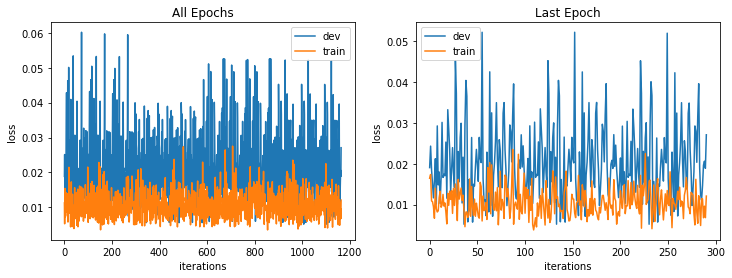

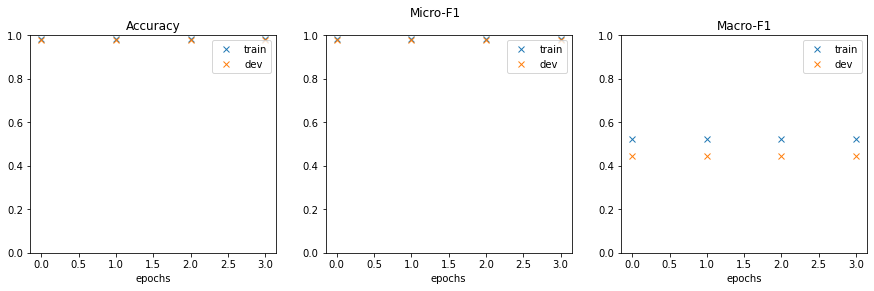

KeyboardInterrupt: 

In [17]:
train_loop(train_X, train_Y, dev_X, dev_Y,
           model=rand_tok_emb_ner_model.to(device),
           opt=optim.Adam(rand_tok_emb_ner_model.parameters(), lr=0.0001),
           n_classes=len(lbl_to_id)-1,
           batch_size=128,
           grad_clip_norm=5)

In [18]:
#torch.save(rand_tok_emb_ner_model.state_dict(), 'data/pt-cache/rand_tok_emb_ner_model.pt')

In [19]:
assert(lbl_to_id['PAD_LBL'] == len(lbl_to_id)-1)
glv_tok_emb_ner_model = NERModel(
    nn.Embedding.from_pretrained(
        glv_emb,
        freeze=False,
        padding_idx=tok_to_id['PAD_TOK']
    ),
    SeqTagModel(
        input_size=100,
        hidden_size=100,
        output_size=len(lbl_to_id)-1,
        dropout_prob=0.5
    ),
    pad_lbl_id=lbl_to_id['PAD_LBL'],
    pad_tok_id=tok_to_id['PAD_TOK'],
    class_freq=torch.bincount(train_Y.reshape(-1))[:-1]
)
rand_tok_emb_ner_model.load_state_dict(torch.load('data/pt-cache/glv_tok_emb_ner_model.pt'))

<All keys matched successfully>

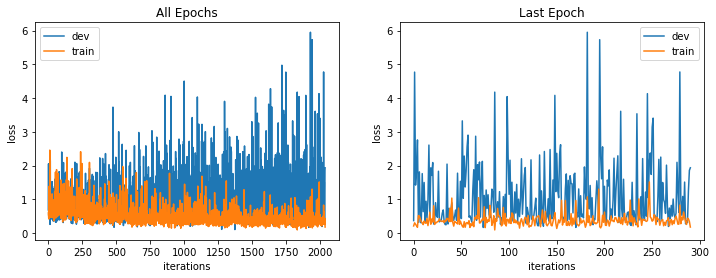

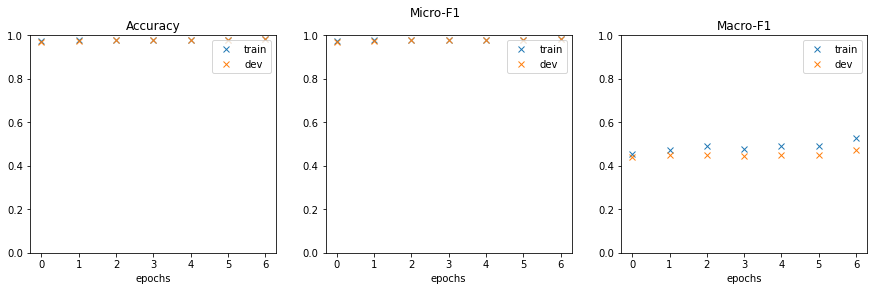

KeyboardInterrupt: 

In [21]:
train_loop(train_X, train_Y, dev_X, dev_Y,
           model=glv_tok_emb_ner_model.to(device),
           opt=optim.Adam(glv_tok_emb_ner_model.parameters(), lr=0.01),
           n_classes=len(lbl_to_id)-1,
           batch_size=128,
           grad_clip_norm=5)

In [23]:
#torch.save(glv_tok_emb_ner_model.state_dict(), 'data/pt-cache/glv_tok_emb_ner_model.pt')